# =============================================================
# MILESTONE 2: Advanced Data Analysis and Feature Engineering
# =============================================================

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy import stats
from scipy.stats import chi2_contingency


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [95]:
# Set plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [96]:
url = "https://raw.githubusercontent.com/Reemsoliiman/customer-churn-prediction-analysis/main/data/interim/initial_cleaned_data.csv"
df = pd.read_csv(url)

print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")


HTTPError: HTTP Error 404: Not Found

# ========================
# 1. Advanced Data Analysis
# ========================

# -------------------------------------
# 1.1 statistical tests
# -------------------------------------

In [70]:
# T-test for Customer service calls
group1 = df[df['Churn'] == False]['Customer service calls']
group2 = df[df['Churn'] == True]['Customer service calls']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-test for Customer service calls: t={t_stat:.3f}, p={p_value:.3f}")

T-test for Customer service calls: t=-12.319, p=0.000


In [71]:
# T-test for Total day minutes
group1 = df[df['Churn'] == False]['Total day minutes']
group2 = df[df['Churn'] == True]['Total day minutes']
t_stat, p_value = stats.ttest_ind(group1, group2)
print(f"T-test for Total day minutes: t={t_stat:.3f}, p={p_value:.3f}")

T-test for Total day minutes: t=-12.075, p=0.000


In [72]:
categorical_cols = [
    'State_AL', 'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE', 'State_FL', 'State_GA',
    'State_HI', 'State_IA', 'State_ID', 'State_IL', 'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD',
    'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC', 'State_ND', 'State_NE', 'State_NH',
    'State_NJ', 'State_NM', 'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA', 'State_RI', 'State_SC',
    'State_SD', 'State_TN', 'State_TX', 'State_UT', 'State_VA', 'State_VT', 'State_WA', 'State_WI', 'State_WV', 'State_WY',
    'Area code_415', 'Area code_510', 'International plan_Yes', 'Voice mail plan_Yes',
    'Account_Length_Binned_Medium', 'Account_Length_Binned_Long'
]

In [73]:
# Perform Chi-squared tests
chi2_results = []

for col in categorical_cols:
    if col != "Churn":  # Exclude Churn as it's the target
        contingency_table = pd.crosstab(df[col], df["Churn"])
        chi2, p, dof, expected = chi2_contingency(contingency_table)
        chi2_results.append({"Feature": col, "Chi2": chi2, "p-value": p})

# Convert to DataFrame and sort by p-value
chi2_df = pd.DataFrame(chi2_results).sort_values("p-value")

# Display results
print("Chi-squared Test Results:")
display(chi2_df)

# Highlight significant features (p < 0.05)
significant_features = chi2_df[chi2_df['p-value'] < 0.05]
print("\nSignificant Features (p < 0.05):")
display(significant_features)

Chi-squared Test Results:


,Feature,Chi2,p-value
52,International plan_Yes,222.565757,2.493108e-50
53,Voice mail plan_Yes,34.131660,5.150640e-09
30,State_NJ,7.082219,7.785253e-03
42,State_TX,5.720015,1.677259e-02
19,State_MD,4.757345,2.917352e-02
44,State_VA,3.435014,6.382803e-02
39,State_SC,3.162475,7.534888e-02
3,State_CA,3.061232,8.018087e-02
2,State_AZ,2.930757,8.690672e-02
21,State_MI,2.737304,9.803006e-02



Significant Features (p < 0.05):


,Feature,Chi2,p-value
52,International plan_Yes,222.565757,2.493108e-50
53,Voice mail plan_Yes,34.131660,5.150640e-09
30,State_NJ,7.082219,7.785253e-03
42,State_TX,5.720015,1.677259e-02
19,State_MD,4.757345,2.917352e-02


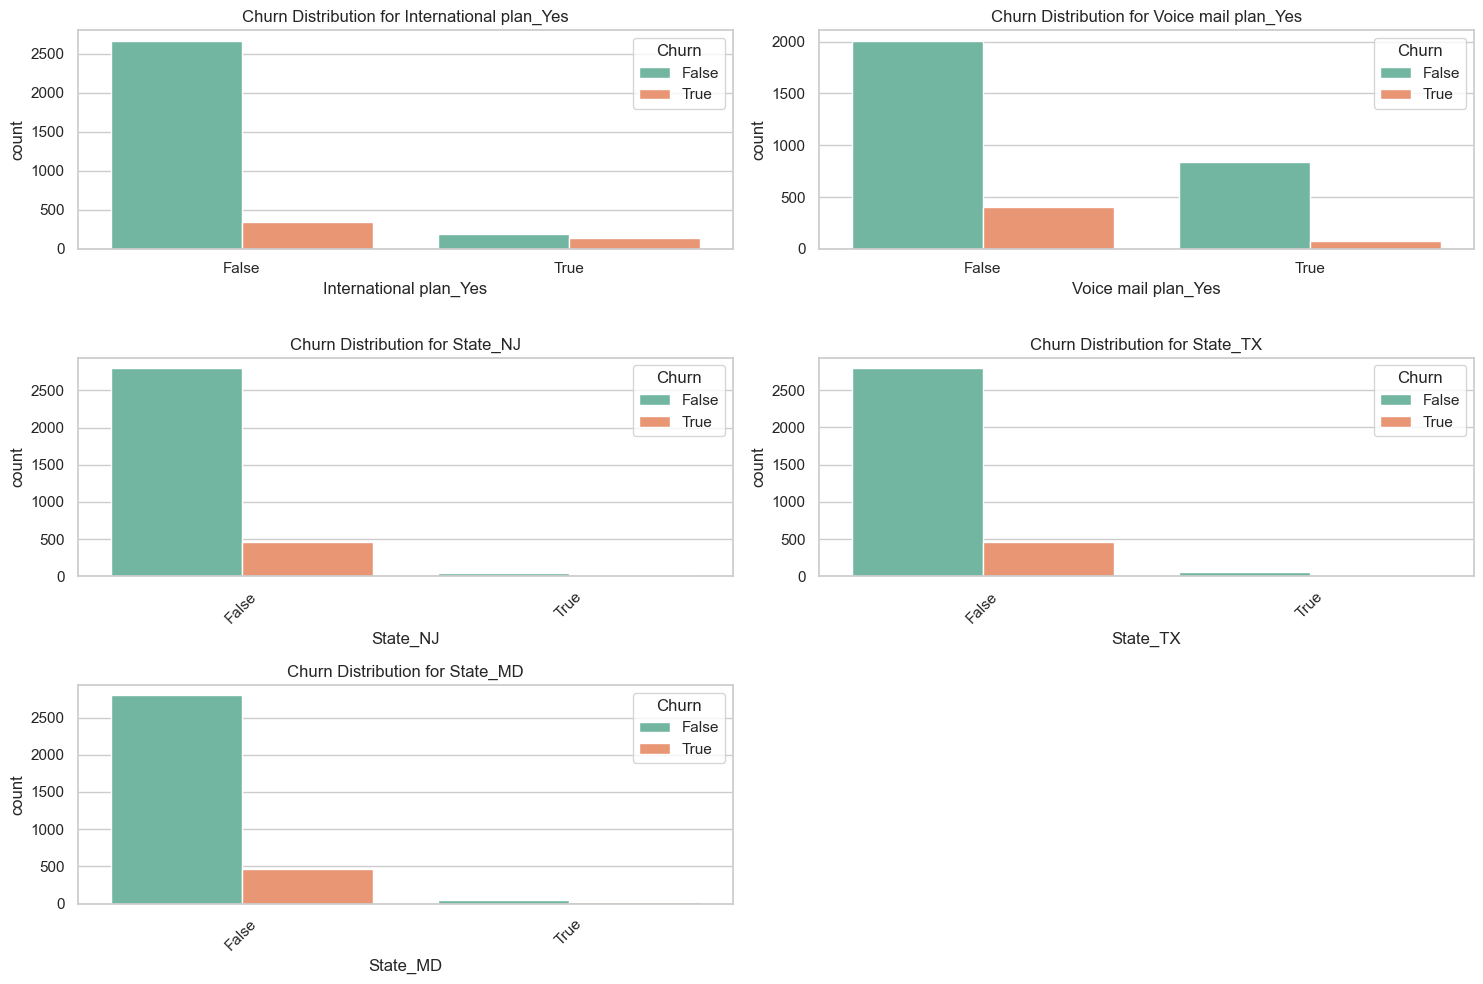

In [74]:
# Visualize significant features with countplot
plt.figure(figsize=(15, 10))
n_cols = 2
n_rows = int(np.ceil(len(significant_features) / n_cols))

for i, row in enumerate(significant_features.itertuples(), 1):
    col = row.Feature
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'Churn Distribution for {col}')
    plt.xticks(rotation=45 if 'State' in col else 0)  # Rotate x-labels for State columns
    plt.legend(title='Churn', labels=['False', 'True'])

plt.tight_layout()
plt.savefig(f'../visualizations/enhanced/countplot_significant_features.png')
plt.show()

In [75]:
for i, row in chi2_df.iterrows():
    signif = "Significant" if row["p-value"] < 0.05 else "Not Significant"
    print(f"{row['Feature']}: p-value={row['p-value']:.4f} --> {signif}")

International plan_Yes: p-value=0.0000 --> Significant
Voice mail plan_Yes: p-value=0.0000 --> Significant
State_NJ: p-value=0.0078 --> Significant
State_TX: p-value=0.0168 --> Significant
State_MD: p-value=0.0292 --> Significant
State_VA: p-value=0.0638 --> Not Significant
State_SC: p-value=0.0753 --> Not Significant
State_CA: p-value=0.0802 --> Not Significant
State_AZ: p-value=0.0869 --> Not Significant
State_MI: p-value=0.0980 --> Not Significant
State_HI: p-value=0.1001 --> Not Significant
State_MS: p-value=0.1465 --> Not Significant
State_NV: p-value=0.1645 --> Not Significant
State_WA: p-value=0.1645 --> Not Significant
State_WV: p-value=0.1729 --> Not Significant
State_ME: p-value=0.2005 --> Not Significant
State_MT: p-value=0.2044 --> Not Significant
State_IA: p-value=0.2150 --> Not Significant
State_WI: p-value=0.2157 --> Not Significant
State_NE: p-value=0.2202 --> Not Significant
State_LA: p-value=0.2466 --> Not Significant
State_IL: p-value=0.2743 --> Not Significant
State

# -------------------------------------
# 1.2 identifying most relevant features
# -------------------------------------

In [76]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('Churn').tolist()
print("Numerical columns:", numeric_cols)

Numerical columns: ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Total_Charge', 'Total_Minutes', 'Avg_Minute_Cost', 'Total_Calls', 'High_Customer_Service']


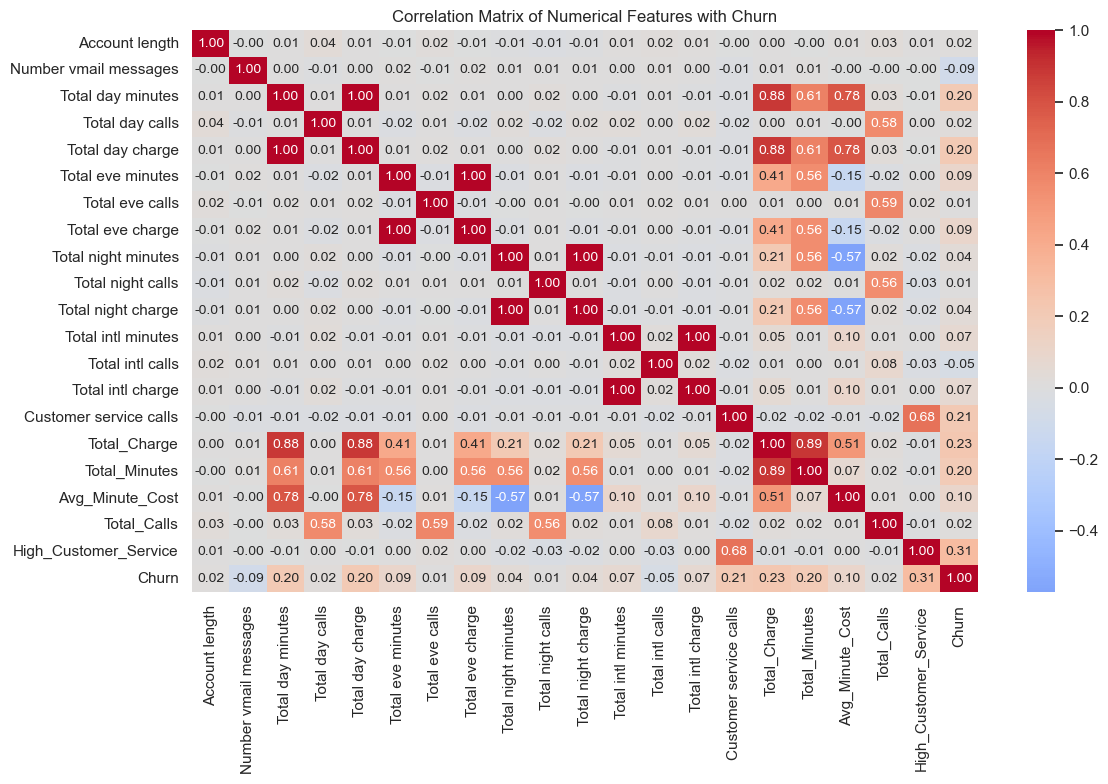

Correlations with Churn:
 Churn                     1.000000
High_Customer_Service     0.311804
Total_Charge              0.231025
Customer service calls    0.208750
Total day charge          0.204789
Total day minutes         0.204788
Total_Minutes             0.198573
Avg_Minute_Cost           0.097686
Total eve minutes         0.092109
Total eve charge          0.092100
Total intl charge         0.066563
Total intl minutes        0.066554
Total night charge        0.036179
Total night minutes       0.036176
Total day calls           0.018459
Account length            0.016275
Total_Calls               0.015807
Total eve calls           0.009233
Total night calls         0.006141
Total intl calls         -0.052844
Number vmail messages    -0.089728
Name: Churn, dtype: float64


In [77]:
correlation_matrix = df[numeric_cols + ['Churn']].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f', annot_kws={"size": 10})
plt.title('Correlation Matrix of Numerical Features with Churn')
plt.tight_layout()
plt.show()

# Display correlations with Churn
churn_correlations = correlation_matrix['Churn'].sort_values(ascending=False)
print("Correlations with Churn:\n", churn_correlations)

Feature Ranking from RFE:
                    Feature  Ranking  Selected
5        Total eve minutes        1      True
15            Total_Charge        1      True
10      Total night charge        1      True
8      Total night minutes        1      True
17         Avg_Minute_Cost        1      True
19   High_Customer_Service        2     False
4         Total day charge        3     False
2        Total day minutes        4     False
11      Total intl minutes        5     False
1    Number vmail messages        6     False
7         Total eve charge        7     False
13       Total intl charge        8     False
12        Total intl calls        9     False
0           Account length       10     False
16           Total_Minutes       11     False
3          Total day calls       12     False
9        Total night calls       13     False
14  Customer service calls       14     False
18             Total_Calls       15     False
6          Total eve calls       16     False


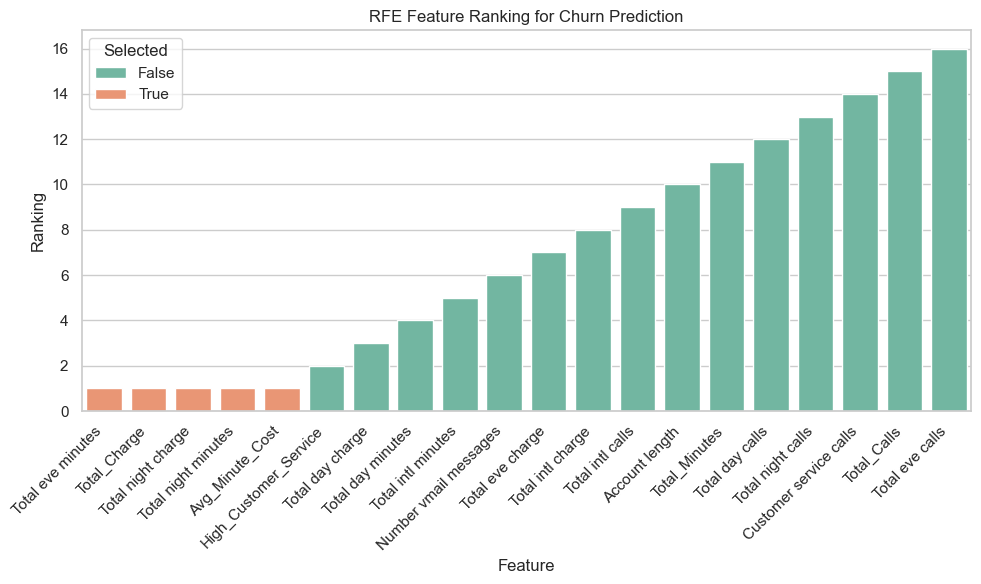

In [78]:
# Prepare data for RFE
X = df[numeric_cols]
y = df['Churn']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Apply RFE
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features
rfe = rfe.fit(X_scaled, y)

# Get results
feature_ranking = pd.DataFrame({
    'Feature': numeric_cols,
    'Ranking': rfe.ranking_,
    'Selected': rfe.support_
})
feature_ranking = feature_ranking.sort_values('Ranking')

# Display results
print("Feature Ranking from RFE:\n", feature_ranking)

# Plot feature importance (based on selection)
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_ranking, x='Feature', y='Ranking', hue='Selected', palette='Set2', dodge=False)
plt.xticks(rotation=45, ha='right')
plt.title('RFE Feature Ranking for Churn Prediction')
plt.tight_layout()
plt.savefig(f'../visualizations/enhanced/rfe_feature_ranking.png')
plt.show()

# ========================
# 2. Feature Engineering
# ========================

# -------------------------------------
# 2.1 Create New Features
# -------------------------------------

In [79]:
#Rename column
df['Customer tenure'] = df['Account length']

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 78 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Account length                3333 non-null   float64
 1   Number vmail messages         3333 non-null   int64  
 2   Total day minutes             3333 non-null   float64
 3   Total day calls               3333 non-null   int64  
 4   Total day charge              3333 non-null   float64
 5   Total eve minutes             3333 non-null   float64
 6   Total eve calls               3333 non-null   int64  
 7   Total eve charge              3333 non-null   float64
 8   Total night minutes           3333 non-null   float64
 9   Total night calls             3333 non-null   int64  
 10  Total night charge            3333 non-null   float64
 11  Total intl minutes            3333 non-null   float64
 12  Total intl calls              3333 non-null   int64  
 13  Tot

# -------------------------------------
# 2.1.1 Usage Patterns
# -------------------------------------

In [81]:
#Average daily usage
df['average daily usage'] = df['Total_Minutes'] / df['Customer tenure']

In [82]:
#Average calls per day
df['Average calls per day'] = (
df['Total_Calls']/df['Customer tenure']
)

In [83]:
#Average minutes per call
df['Average minutes per call'] = np.where(
    df['Total_Calls'] > 0,
    df['Total_Minutes'] / df['Total_Calls'],
    0
)

# -------------------------------------
# 2.1.2 Frequency Of Interactions
# -------------------------------------

In [84]:
#Complaint indicator
df['High service calls'] = (df['Customer service calls'] > 3).astype(int)

In [85]:
#Interaction frequency index
df['Calls per tenure'] = df['Total_Calls'] / df['Customer tenure']

# -------------------------------------
# 2.2 FEATURE TRANSFORMATION
# -------------------------------------

In [86]:
#Log transform highly skewed features
for col in ['Total_Minutes', 'average daily usage', 'Average minutes per call']:
    df[f'log_{col.replace(" ", "_").lower()}'] = np.log1p(df[col])  # log1p handles zeros safely

# -------------------------------------
# 2.3 FEATURE SCALING
# -------------------------------------

In [87]:
scaler = MinMaxScaler()
numeric_features = [
    'Customer tenure',
    'Total_Minutes',
    'average daily usage',
    'Total_Calls',
    'Average calls per day',
    'Average minutes per call',
    'Calls per tenure'
]
df_scaled = df.copy()
df_scaled[numeric_features] = scaler.fit_transform(df[numeric_features])

# -------------------------------------
# 2.4 ENCODING CATEGORICAL VARIABLES
# -------------------------------------

In [88]:
#One-hot encode binary categorical variables(already encoded in milestone 1)
df_encoded =df_scaled

In [89]:
print(df_scaled.columns)

Index(['Account length', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn', 'Total_Charge', 'Total_Minutes', 'Avg_Minute_Cost',
       'Total_Calls', 'High_Customer_Service', 'State_AL', 'State_AR',
       'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC', 'State_DE',
       'State_FL', 'State_GA', 'State_HI', 'State_IA', 'State_ID', 'State_IL',
       'State_IN', 'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD',
       'State_ME', 'State_MI', 'State_MN', 'State_MO', 'State_MS', 'State_MT',
       'State_NC', 'State_ND', 'State_NE', 'State_NH', 'State_NJ', 'State_NM',
       'State_NV', 'State_NY', 'State_OH', 'State_OK', 'State_OR', 'State_PA',
       'State_RI', 'State_SC', 'St

In [90]:
print("Final feature set shape:", df_encoded.shape)
df_encoded.head()

Final feature set shape: (3333, 86)


,Account length,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,...,Account_Length_Binned_Long,Customer tenure,average daily usage,Average calls per day,Average minutes per call,High service calls,Calls per tenure,log_total_minutes,log_average_daily_usage,log_average_minutes_per_call
0,117.0,0,184.50,97,31.37,338.35,80,28.76,215.8,90,...,False,0.564477,0.006354,0.002808,0.705257,0,0.002808,6.617871,1.999804,1.323820
1,65.0,0,129.10,137,21.95,228.50,83,19.42,208.8,111,...,False,0.311436,0.009909,0.010361,0.331111,1,0.010361,6.363201,2.293467,1.000043
2,161.0,0,325.45,67,55.33,317.80,97,27.01,160.6,128,...,True,0.778589,0.004435,0.001632,0.680342,1,0.001632,6.697343,1.796149,1.305230
3,111.0,0,110.40,103,18.77,137.30,102,11.67,189.6,105,...,False,0.535280,0.003000,0.004205,0.219456,0,0.004205,6.100319,1.611238,0.878891
4,49.0,0,119.30,117,20.28,215.10,109,18.28,178.7,90,...,False,0.233577,0.012431,0.013744,0.307795,0,0.013744,6.263779,2.459414,0.975928


In [91]:
# Save interim dataset with new features
df_encoded.to_csv('../data/processed/cleaned_data.csv', index=False)
print("Final processed dataset saved as 'cleaned_data.csv' in data/processed/")

Final processed dataset saved as 'cleaned_data.csv' in data/processed/


# -------------------------------------
# 3. advanced visualizations
# -------------------------------------



# -------------------------------------
# 3.1.visualizations
# -------------------------------------

In [92]:
import os
import plotly.express as px
import plotly.graph_objects as go

# Ensure the output directory exists
output_dir = "../visualizations/interactive"
os.makedirs(output_dir, exist_ok=True)

# 1. Churn Rate Pie Chart
fig_pie = px.pie(df, names='Churn', title='Churn Rate Distribution', color='Churn',
                 color_discrete_map={False: 'lightblue', True: 'salmon'})
fig_pie.write_html(os.path.join(output_dir, "churn_rate_pie.html"))
fig_pie.show()

# 2. Churn by State (Top 10 states with most churn)
state_cols = [col for col in df.columns if col.startswith('State_')]
df_states = df[state_cols + ['Churn']].copy()
df_states['State'] = df_states[state_cols].idxmax(axis=1).str.replace('State_', '')
churn_by_state = df_states[df_states['Churn'] == True]['State'].value_counts().nlargest(10)
fig_bar = px.bar(churn_by_state, x=churn_by_state.index, y=churn_by_state.values,
                 labels={'x': 'State', 'y': 'Churned Customers'},
                 title='Top 10 States by Churn Count', 
                 color=churn_by_state.values, 
                 color_continuous_scale='Reds')
fig_bar.write_html(os.path.join(output_dir, "top10_states_churn.html"))
fig_bar.show()

# 3. Distribution of Average Daily Usage by Churn
fig_hist = px.histogram(df, x='average daily usage', color='Churn', nbins=40, barmode='overlay',
                        title='Distribution of Average Daily Usage by Churn',
                        color_discrete_map={False: 'lightblue', True: 'salmon'})
fig_hist.write_html(os.path.join(output_dir, "avg_daily_usage_by_churn.html"))
fig_hist.show()

# 4. Scatter Plot: Total Minutes vs. Total Calls colored by Churn
fig_scatter = px.scatter(df, x='Total_Minutes', y='Total_Calls', color='Churn',
                         title='Total Minutes vs. Total Calls by Churn',
                         color_discrete_map={False: 'lightblue', True: 'salmon'},
                         hover_data=['Customer tenure'])
fig_scatter.write_html(os.path.join(output_dir, "minutes_vs_calls_by_churn.html"))
fig_scatter.show()

# 5. Box Plot: Customer Tenure by Churn
fig_box = px.box(df, x='Churn', y='Customer tenure', color='Churn',
                 title='Customer Tenure by Churn',
                 color_discrete_map={False: 'lightblue', True: 'salmon'})
fig_box.write_html(os.path.join(output_dir, "tenure_by_churn.html"))
fig_box.show()

# -------------------------------------
# 3.2.dashboard
# -------------------------------------

In [93]:

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go


# Color scheme
colors = {False: "royalblue", True: "crimson"}

# 1. Pie chart: Churn distribution
fig_pie = px.pie(
    df, names="Churn", color="Churn",
    color_discrete_map=colors, hole=0.4
)
fig_pie.update_traces(textinfo="percent+label", pull=[0, 0.05])

# 2. Bar chart: Top 10 states
state_cols = [col for col in df.columns if col.startswith("State_")]
df_states = df[state_cols + ["Churn"]].copy()
df_states["State"] = df_states[state_cols].idxmax(axis=1).str.replace("State_", "")
churn_by_state = df_states[df_states["Churn"] == True]["State"].value_counts().nlargest(10)
fig_bar = px.bar(
    churn_by_state, x=churn_by_state.index, y=churn_by_state.values,
    labels={"x": "State", "y": "Churned Customers"},
    color=churn_by_state.values, color_continuous_scale="Reds"
)
fig_bar.update_layout(xaxis_tickangle=-45)

# 3. Histogram: Daily usage
fig_hist = px.histogram(
    df, x="average daily usage", color="Churn", nbins=40, barmode="overlay",
    color_discrete_map=colors
)
fig_hist.update_traces(opacity=0.7)

# 4. Scatter: Minutes vs Calls
fig_scatter = px.scatter(
    df, x="Total_Minutes", y="Total_Calls", color="Churn",
    color_discrete_map=colors, hover_data=["Customer tenure"],
    size="Customer tenure", size_max=10
)

# 5. Boxplot: Tenure
fig_box = px.box(
    df, x="Churn", y="Customer tenure", color="Churn",
    color_discrete_map=colors, points="all"
)

# 6. Line chart: Tenure groups
df["Tenure_Group"] = pd.cut(df["Customer tenure"], bins=[0,12,24,36,48,60,72],
                            labels=["0-12","13-24","25-36","37-48","49-60","61-72"])
churn_by_tenure = df.groupby("Tenure_Group")["Churn"].mean().reset_index()
fig_line = px.line(
    churn_by_tenure, x="Tenure_Group", y="Churn", markers=True,
    line_shape="spline"
)
fig_line.update_traces(line=dict(width=3, color="crimson"))

# --- Combine into dashboard ---
dashboard = make_subplots(
    rows=3, cols=2,
    specs=[
        [{"type": "domain"}, {"type": "xy"}],
        [{"type": "xy"}, {"type": "xy"}],
        [{"type": "xy"}, {"type": "xy"}]
    ],
    horizontal_spacing=0.12,
    vertical_spacing=0.15
)

# Add each figure
for trace in fig_pie.data:
    dashboard.add_trace(trace, row=1, col=1)
for trace in fig_bar.data:
    dashboard.add_trace(trace, row=1, col=2)
for trace in fig_hist.data:
    dashboard.add_trace(trace, row=2, col=1)
for trace in fig_scatter.data:
    dashboard.add_trace(trace, row=2, col=2)
for trace in fig_box.data:
    dashboard.add_trace(trace, row=3, col=1)
for trace in fig_line.data:
    dashboard.add_trace(trace, row=3, col=2)

# --- Add subplot titles as annotations (graph names) ---
titles = [
    "Churn Distribution", "Top 10 States by Churn",
    "Daily Usage Distribution", "Minutes vs Calls",
    "Customer Tenure Distribution", "Churn by Tenure Groups"
]

# Adjusted positions (slightly higher than plots)
positions = [
    (0.18, 1.05), (0.82, 1.05),   # Row 1
    (0.18, 0.70), (0.82, 0.70),   # Row 2
    (0.18, 0.36), (0.82, 0.36)    # Row 3
]

for title, (x, y) in zip(titles, positions):
    dashboard.add_annotation(
        text=title,
        x=x, y=y,
        xref="paper", yref="paper",
        showarrow=False,
        font=dict(size=15, family="Arial", color="black"),
        align="center"
    )

# --- Final layout polish ---
dashboard.update_layout(
    height=1400, width=1200,
    title_text="Customer Churn Dashboard",
    title_x=0.5,
    template="plotly_white",
    legend=dict(orientation="h", y=-0.1, x=0.3),
    margin=dict(l=50, r=50, t=120, b=50)
)

dashboard.show()

# Ensure the output directory exists
output_dir = "../visualizations/interactive"
os.makedirs(output_dir, exist_ok=True)

# Save the dashboard
dashboard.write_html(os.path.join(output_dir, "churn_dashboard.html"))

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14720\1854635567.py:51: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

